In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from imblearn.under_sampling import TomekLinks

# Data exploration

In [1]:
df = pd.read_csv("data/test.txt", sep=";", decimal=',')

print("ROWS:", df.shape[0], "COLUMNS: ", df.shape[1], "\n")

# set the correct typing to columns
df['MontAnt'] = pd.to_numeric(df['MontAnt'], downcast='float')
df['DAteTrAnsAction'] = pd.to_datetime(df['DAteTrAnsAction'])

# useless columns
df.drop(['ZIBZIN', 'IDAvisAutorisAtionCheque'], axis=1, inplace=True)

print("DATA TYPING: ")
print(df.dtypes, "\n")

NameError: name 'pd' is not defined

In [10]:
print("DATA DESCRIPTION\n")
df.describe()

DATA DESCRIPTION



,MontAnt,CodeDecision,VerifiAnceCPT1,VerifiAnceCPT2,VerifiAnceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TAuxImpNb_RB,TAuxImpNB_CPM,EcArtNumCheq,NbrMAgAsin3J,DiffDAteTr1,DiffDAteTr2,DiffDAteTr3,CA3TRetMtt,CA3TR,Heure,FlAgImpAye
count,264143.000000,264143.000000,264143.000000,264143.000000,264143.000000,264143.000000,264143.000000,264143.000000,264143.000000,264143.000000,264143.000000,2.641430e+05,264143.000000,264143.000000,264143.000000,264143.000000,264143.000000,264143.000000,264143.000000,264143.000000
mean,58.745239,0.014473,0.392579,0.418868,0.464972,234.201769,3.076643,0.564414,0.185300,32.922489,32.717720,5.758895e+03,1.032562,3.973935,4.243183,4.273391,64.920136,6.174899,53541.022670,0.003237
std,84.104126,0.175802,0.519606,0.588430,0.712331,208.760007,30.026408,9.353397,0.574982,95.844590,34.639825,1.583986e+05,0.183899,1.059278,0.549602,0.468173,95.891564,37.963702,11729.169206,0.056802
min,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-47.552842,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000116,0.000475,0.002025,0.020000,0.000000,26669.000000,0.000000
25%,24.900000,0.000000,0.000000,0.000000,0.000000,1.000000,0.007220,-3.012904,0.001443,0.000000,13.908206,0.000000e+00,1.000000,4.000000,4.000000,4.000000,27.400000,0.000000,42647.000000,0.000000
50%,41.910000,0.000000,0.000000,0.000000,0.000000,212.000000,0.018376,0.000000,0.002552,15.479876,25.265285,0.000000e+00,1.000000,4.000000,4.000000,4.000000,46.500000,0.000000,55059.000000,0.000000
75%,70.255001,0.000000,1.000000,1.000000,1.000000,448.000000,0.169776,5.111410,0.020151,34.602076,39.274924,0.000000e+00,1.000000,5.000000,5.000000,5.000000,78.630000,0.000000,63779.000000,0.000000
max,15300.000000,3.000000,10.000000,17.000000,36.000000,551.000000,4950.000000,46.891244,16.516975,10000.000000,714.285714,9.948073e+06,10.000000,5.000000,5.000000,5.000000,15589.000000,10600.000000,79676.000000,1.000000


In [12]:
print("DATA HEAD\n")
df.head()

DATA HEAD 



,MontAnt,DAteTrAnsAction,CodeDecision,VerifiAnceCPT1,VerifiAnceCPT2,VerifiAnceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,...,TAuxImpNB_CPM,EcArtNumCheq,NbrMAgAsin3J,DiffDAteTr1,DiffDAteTr2,DiffDAteTr3,CA3TRetMtt,CA3TR,Heure,FlAgImpAye
0,45.410000,2016-09-20 07:33:50,0,1,1,1,551,0.000000,0.000000,0.000000,...,39.274924,0,1,4.000000,4.000000,4.000000,45.41,0.00,27230,0
1,62.060001,2016-09-20 08:05:18,0,1,1,1,1,0.000000,0.000000,0.000000,...,12.586532,0,1,5.000000,5.000000,5.000000,62.06,0.00,29118,0
2,16.430000,2016-09-20 08:06:20,0,0,0,0,302,0.013601,9.217897,0.001789,...,24.301337,3,1,0.997674,1.971632,2.992963,61.17,44.74,29180,0
3,72.519997,2016-09-20 08:22:04,0,1,1,1,1,0.000000,0.000000,0.000000,...,4.723666,0,1,5.000000,5.000000,5.000000,72.52,0.00,30124,0
4,10.000000,2016-09-20 08:27:19,0,0,0,0,511,0.000000,0.000000,0.000000,...,39.274924,0,1,4.000000,4.000000,4.000000,10.00,0.00,30439,0


In [15]:
# there is not null data in our dataset columns
print("COLUMNS AND NULL VALUES COUNT\n")
df.isnull().sum()


COLUMNS AND NULL VALUES COUNT



MontAnt            0
DAteTrAnsAction    0
CodeDecision       0
VerifiAnceCPT1     0
VerifiAnceCPT2     0
VerifiAnceCPT3     0
D2CB               0
ScoringFP1         0
ScoringFP2         0
ScoringFP3         0
TAuxImpNb_RB       0
TAuxImpNB_CPM      0
EcArtNumCheq       0
NbrMAgAsin3J       0
DiffDAteTr1        0
DiffDAteTr2        0
DiffDAteTr3        0
CA3TRetMtt         0
CA3TR              0
Heure              0
FlAgImpAye         0
dtype: int64

In [18]:
rows = len(df)
fraud_flag = df['FlAgImpAye'].value_counts()
print(f'NOT FRAUDS { fraud_flag[0] } \t REPRESENTS { round((fraud_flag[0] / rows) * 100, 3) } %')
print(f'FRAUDS { fraud_flag[1] } \t\t REPRESENTS { round((fraud_flag[1] / rows) * 100, 3) } %')
px.pie(names=fraud_flag.index, values=fraud_flag, title="Frauds vs Non Frauds Transactions")

NOT FRAUDS 263288 	 REPRESENTS 99.676 %
FRAUDS 855 		 REPRESENTS 0.324 %


# Explore distributions


In [19]:
# extract in different dicts the fraudulent and non fraudulent samples
df_frauds = df.loc[df['FlAgImpAye'] == 1]
df_non_frauds = df.loc[df['FlAgImpAye'] == 0]


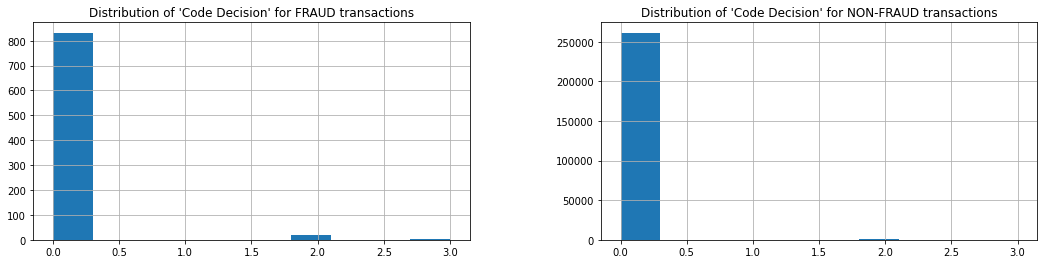

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(18,4))

df_frauds.hist(column="CodeDecision", ax=axs[0])
axs[0].set_title("Distribution of 'Code Decision' for FRAUD transactions")

df_non_frauds.hist(column="CodeDecision", ax=axs[1])
axs[1].set_title("Distribution of 'Code Decision' for NON-FRAUD transactions")
plt.show()

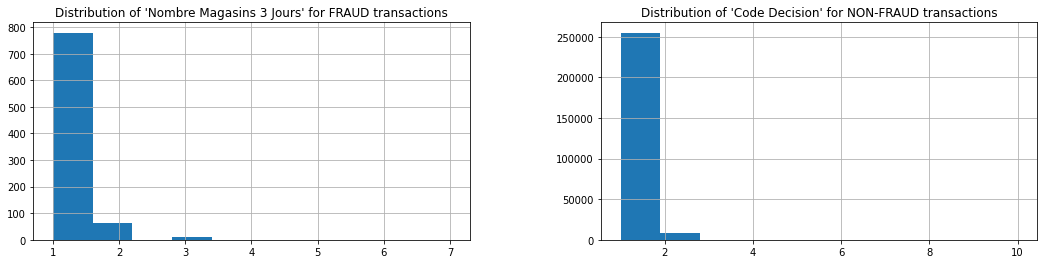

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(18,4))

df_frauds.hist(column="NbrMAgAsin3J", ax=axs[0])
axs[0].set_title("Distribution of 'Nombre Magasins 3 Jours' for FRAUD transactions")

df_non_frauds.hist(column="NbrMAgAsin3J", ax=axs[1])
axs[1].set_title("Distribution of 'Code Decision' for NON-FRAUD transactions")
plt.show()

<AxesSubplot:title={'center':"Distribution of 'Nombre de transactions' by day (ONLY FRAUDS)"}, xlabel='DAteTrAnsAction'>

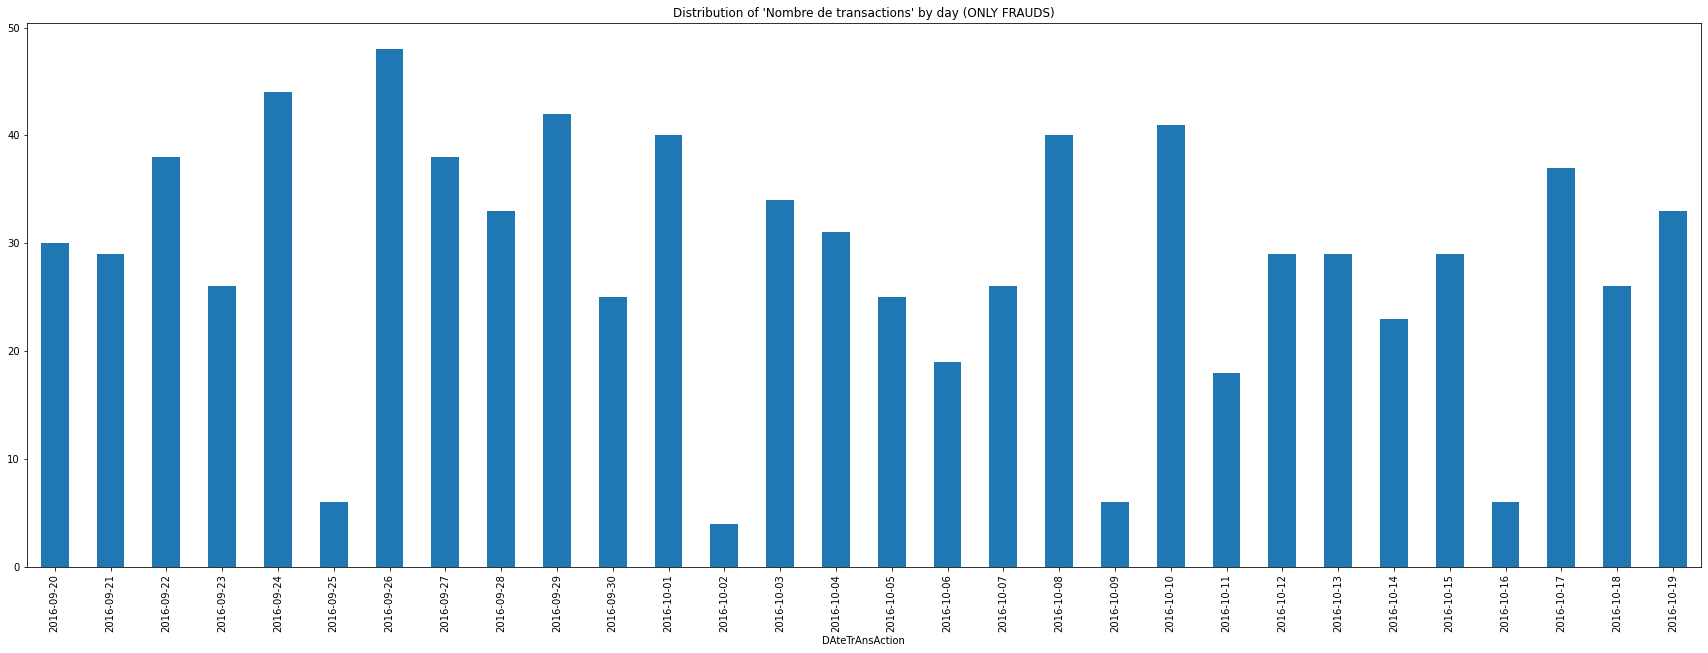

In [55]:
plt.figure(figsize=(30,10))
df_frauds['MontAnt'].groupby([df['DAteTrAnsAction'].dt.to_period('D')]).count()\
    .plot(kind='bar', title="Distribution of 'Nombre de transactions' by day (ONLY FRAUDS)")


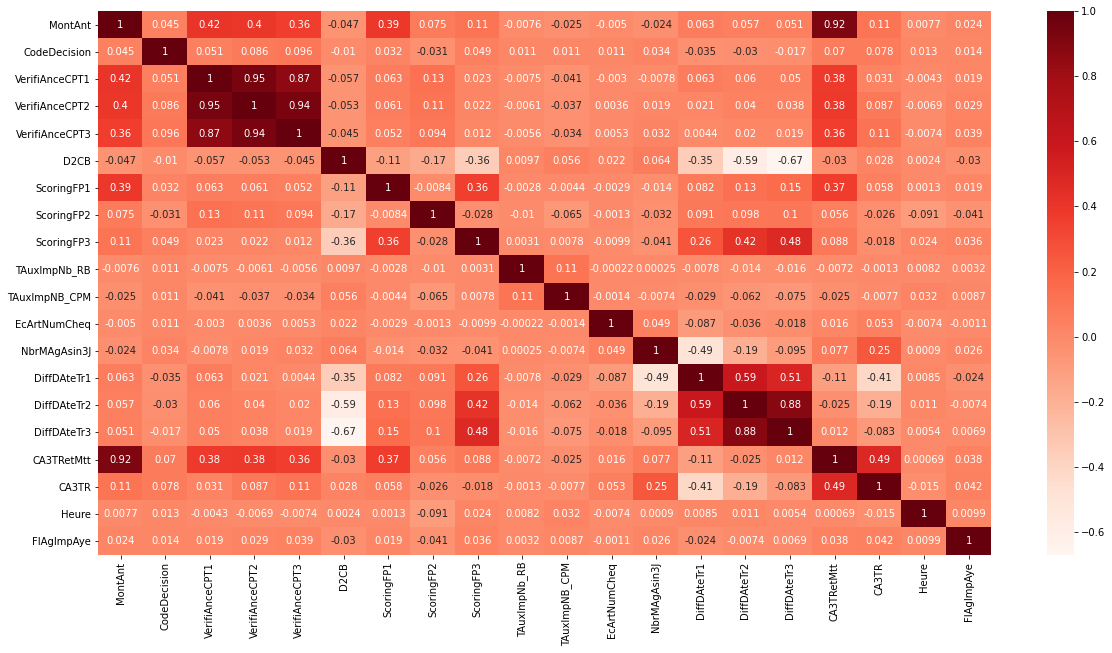

In [60]:
plt.figure(figsize=(20,10))
heatmap = sns.heatmap(df.corr(), annot=True, cbar=True, cmap=plt.cm.Reds)


Text(0.5, 1.0, 'D2CB 1')

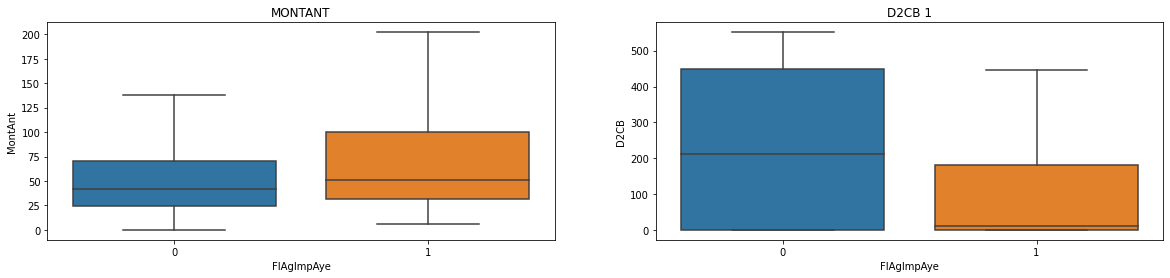

In [67]:
f, axes = plt.subplots(ncols=2, figsize=(20,4))

sns.boxplot(data=df, x="FlAgImpAye", y="MontAnt", showfliers=False, ax=axes[0])
axes[0].set_title("MONTANT")

sns.boxplot(data=df, x="FlAgImpAye", y="D2CB", showfliers=False)
axes[1].set_title("D2CB 1")

Text(0.5, 1.0, 'TAUX IMPEYÉS CPM')

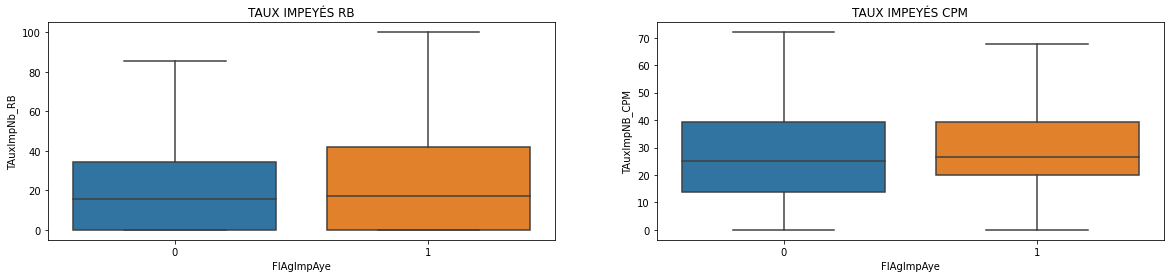

In [73]:
f, axes = plt.subplots(ncols=2, figsize=(20,4))

sns.boxplot(data=df, x="FlAgImpAye", y="TAuxImpNb_RB", showfliers=False, ax=axes[0])
axes[0].set_title("TAUX IMPEYÉS RB")

sns.boxplot(data=df, x="FlAgImpAye", y="TAuxImpNB_CPM", showfliers=False, ax=axes[1])
axes[1].set_title("TAUX IMPEYÉS CPM")

Text(0.5, 1.0, 'Scoring 3')

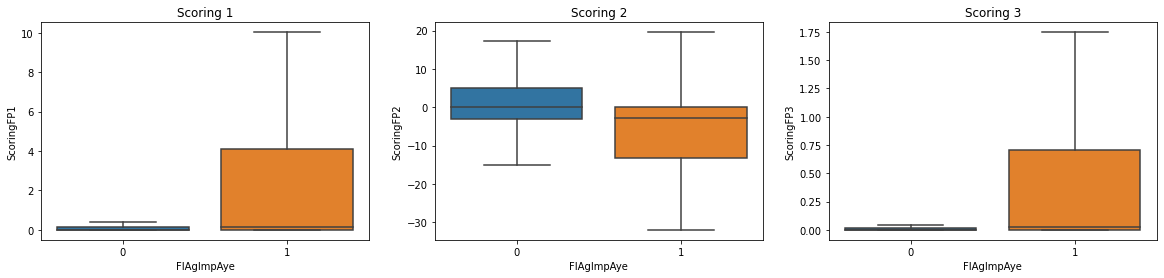

In [65]:
f, axes = plt.subplots(ncols=3, figsize=(20,4))
sns.boxplot(data=df, x="FlAgImpAye", y="ScoringFP1", showfliers=False, ax=axes[0])
axes[0].set_title("Scoring 1")

sns.boxplot(data=df, x="FlAgImpAye", y="ScoringFP2", showfliers=False, ax=axes[1])
axes[1].set_title("Scoring 2")

sns.boxplot(data=df, x="FlAgImpAye", y="ScoringFP3", showfliers=False, ax=axes[2])
axes[2].set_title("Scoring 3")

Text(0.5, 1.0, 'Scoring 3')

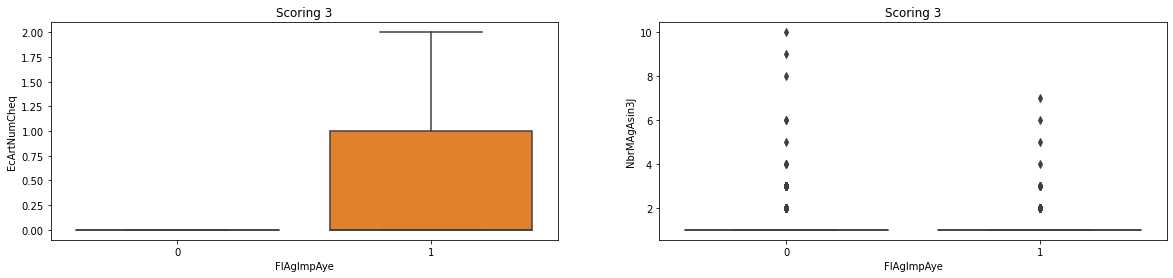

In [77]:
f, axes = plt.subplots(ncols=2, figsize=(20,4))

sns.boxplot(data=df, x="FlAgImpAye", y="EcArtNumCheq", showfliers=False, ax=axes[0])
axes[0].set_title("Scoring 3")

sns.boxplot(data=df, x="FlAgImpAye", y="NbrMAgAsin3J", showfliers=True, ax=axes[1])
axes[1].set_title("Scoring 3")

Text(0.5, 1.0, 'Diff Date Tra 3')

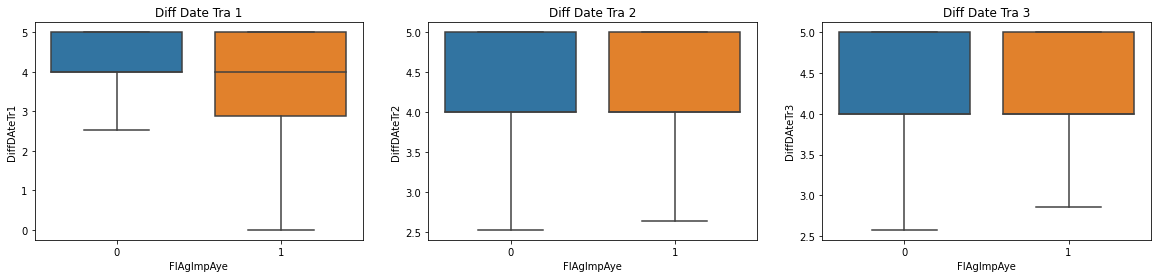

In [24]:
f, axes = plt.subplots(ncols=3, figsize=(20,4))
sns.boxplot(data=df, x="FlAgImpAye", y="DiffDAteTr1", showfliers=False, ax=axes[0])
axes[0].set_title("Diff Date Tra 1")

sns.boxplot(data=df, x="FlAgImpAye", y="DiffDAteTr2", showfliers=False, ax=axes[1])
axes[1].set_title("Diff Date Tra 2")

sns.boxplot(data=df, x="FlAgImpAye", y="DiffDAteTr3", showfliers=False, ax=axes[2])
axes[2].set_title("Diff Date Tra 3")

Text(0.5, 1.0, 'Montant 3 derniers')

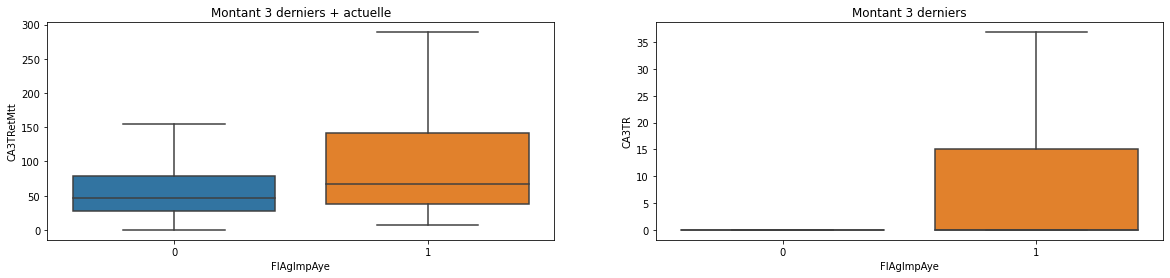

In [81]:
f, axes = plt.subplots(ncols=2, figsize=(20,4))
sns.boxplot(data=df, x="FlAgImpAye", y="CA3TRetMtt", showfliers=False, ax=axes[0])
axes[0].set_title("Montant 3 derniers + actuelle")

sns.boxplot(data=df, x="FlAgImpAye", y="CA3TR", showfliers=False, ax=axes[1])
axes[1].set_title("Montant 3 derniers")